In [30]:
import pandas as pd
import numpy as np
import math 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import yfinance as yf 
%matplotlib inline
import plotly.express as px

In [13]:
msft = yf.Ticker("MSFT")
msft_hist = msft.history(period="max")
msft = pd.DataFrame(msft_hist)

In [15]:
nio = yf.Ticker('NIO')
nio_hist = nio.history(period="max")
nio = pd.DataFrame(nio_hist)

In [17]:
x = msft.index
y = msft['Close']

## EDA

In [35]:
def df_plot(data, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

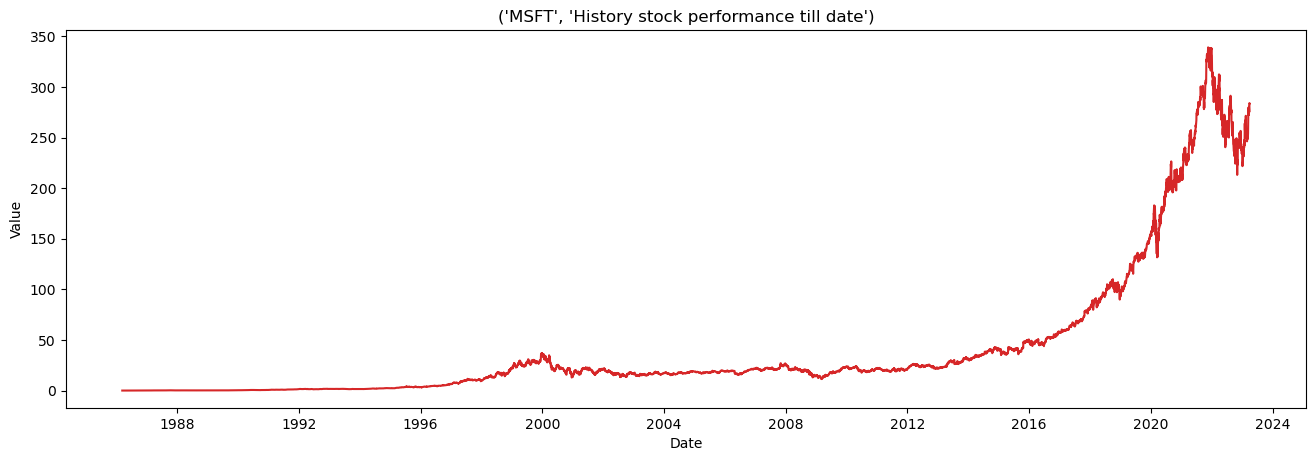

In [36]:
stock_name= "MSFT"
title = (stock_name,"History stock performance till date")
df_plot(msft , x , y , title=title,xlabel='Date', ylabel='Value',dpi=100)

In [21]:
print(msft.isnull().sum())

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [22]:
msft = msft.dropna()

In [25]:
msft.drop_duplicates(keep=False, inplace=True)

In [26]:
q1 = msft['Close'].quantile(0.25)
q3 = msft['Close'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
df = msft[msft['Close'] <= upper_bound]

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
msft[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(msft[['Open', 'High', 'Low', 'Close', 'Volume']])

In [46]:
msft = pd.read_csv('msft.csv')

In [48]:
#print(msft.isnull().sum())

In [49]:
msft['Date'] = pd.to_datetime(msft['Date'])

In [50]:
print(msft.duplicated().sum())

0


In [56]:
msft.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'}, inplace=True)

In [53]:
q1 = msft['Close'].quantile(0.25)
q3 = msft['Close'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
df = msft[msft['Close'] <= upper_bound]

In [58]:
scaler = StandardScaler()
msft[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(msft[['Open', 'High', 'Low', 'Close', 'Volume']])

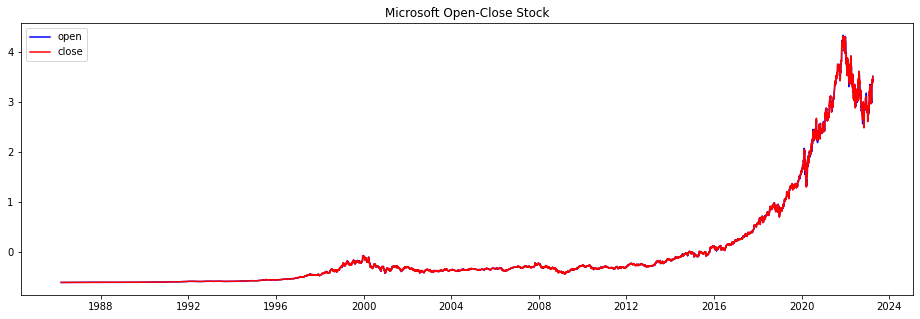

In [70]:
plt.plot(msft['Date'],
         msft['Open'],
         color="blue",
         label="open")
plt.plot(msft['Date'],
         msft['Close'],
         color="red",
         label="close")
plt.title("Microsoft Open-Close Stock")
plt.legend()

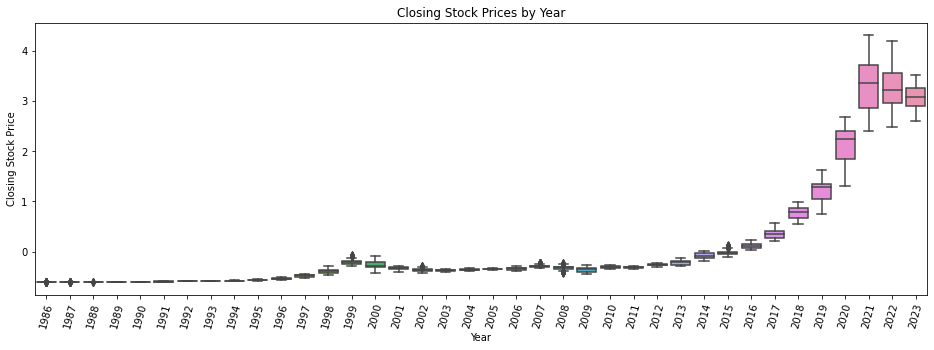

In [74]:
msft['year'] = msft['Date'].dt.year
sns.boxplot(x='year', y='Close', data=msft)
plt.title('Closing Stock Prices by Year')
plt.xlabel('Year')
plt.ylabel('Closing Stock Price')
plt.xticks(rotation=75)
plt.show()

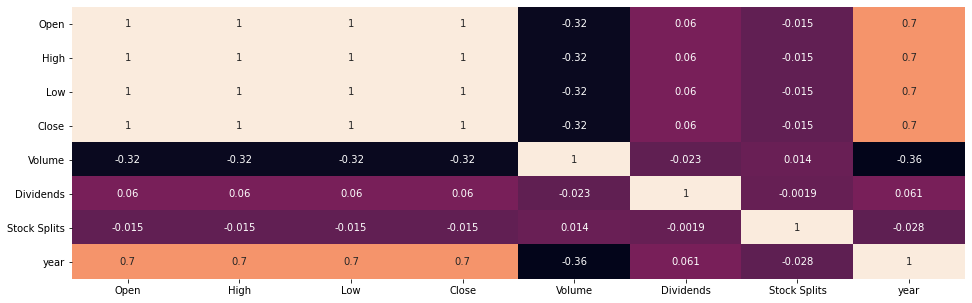

In [78]:
sns.heatmap(msft.corr(),
            annot=True,
            cbar=False)
plt.show()

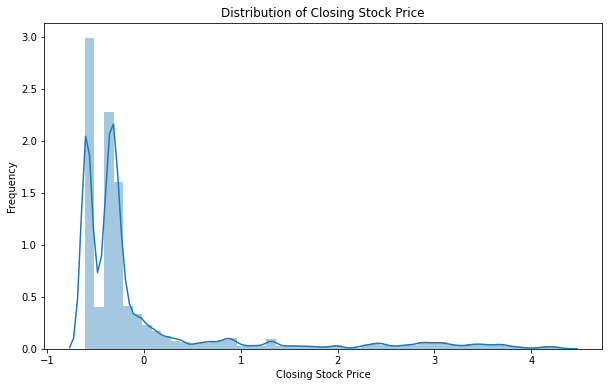

In [80]:
plt.figure(figsize=(10, 6))
sns.distplot(msft['Close'], kde=True)
plt.title('Distribution of Closing Stock Price')
plt.xlabel('Closing Stock Price')
plt.ylabel('Frequency')
plt.show()

In [84]:
msft = yf.Ticker("MSFT")
msft_hist = msft.history(period="max")
msft = pd.DataFrame(msft_hist)

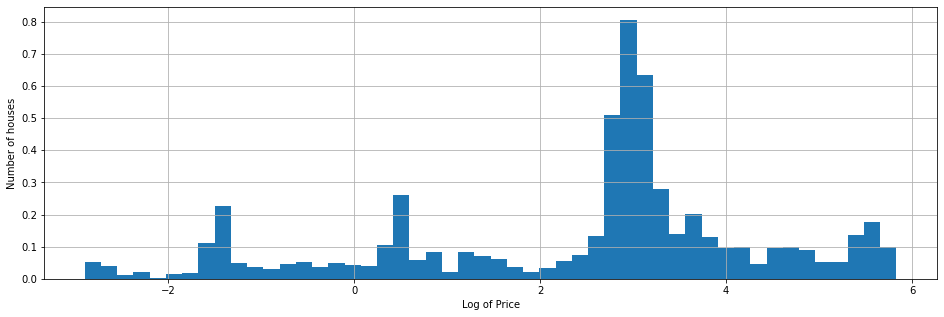

In [87]:
np.log(msft['Open']).hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Log of Price')
plt.show()

In [88]:
x = msft.index
y = msft['Close']

In [89]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.15 , shuffle=False,random_state = 0)

In [90]:
print(train_x.shape )
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(7938,)
(1401,)
(7938,)
(1401,)
